In [291]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
colors = ['cyan', 'turquoise', 'darkturquoise', 'seagreen',
         'lightseagreen', 'lightsteelblue', 'slategray', 'palegreen']

In [308]:
# dynamics
A = np.array([
    [-2, -1],
    [1, 2]
])

# time samples
ts = np.linspace(0, 0.3, 20)

# starting points
X0 = np.random.normal(size=(200, 2))*10

noise = False

In [309]:
np.linalg.eig(A)

(array([-1.73205081,  1.73205081]),
 array([[-0.96592583,  0.25881905],
        [ 0.25881905, -0.96592583]]))

In [313]:
# transition fn
f = lambda x0, dt: scipy.linalg.expm(A*dt).dot(x0) + (np.random.normal(size=(2,1))*0.2 if noise else np.zeros(2))

# for each point in time, compute the position of the ensemble
X = np.array([np.apply_along_axis(lambda x: f(x, dt), axis=1, arr=X0) for dt in ts])

In [315]:
# n time samples, n ensemble, dim(x)
X.shape

(20, 200, 2)

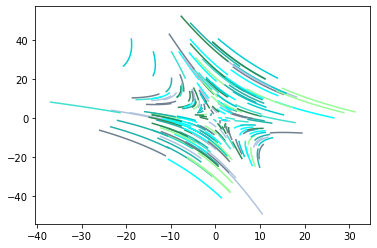

In [314]:
fig = plt.figure()
for i in range(X.shape[1]):
    plt.plot(*X[:, i, :].T, color=np.random.choice(colors))
plt.show()

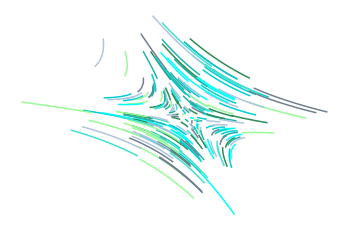

In [316]:
# save with transparent background
fig = plt.figure(frameon=False)
plt.axis('off')
for i in range(X.shape[1]):
    plt.plot(*X[:, i, :].T, color=np.random.choice(colors))
plt.savefig("test.png", bbox_inches='tight')